## preprocess data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
FEATURES = ("grid_cc", "grid_exg", "grid_ch", "grid_cv")

### load data

In [4]:
data_2020 = dict.fromkeys(FEATURES)

for feature in FEATURES:
    file_name = "./imputed-data-version2/2020/" + feature + ".pkl"
    data_2020[feature] = pd.read_pickle(file_name)
    
yield_data_2020 = pd.read_pickle("./imputed-data-version2/2020/yield.pkl")

In [5]:
data_2021 = dict.fromkeys(FEATURES)

for feature in FEATURES:
    file_name = "./imputed-data-version2/2021/" + feature + ".pkl"
    data_2021[feature] = pd.read_pickle(file_name)
    
yield_data_2021 = pd.read_pickle("./imputed-data-version2/2021/yield.pkl")

In [6]:
data_2022 = dict.fromkeys(FEATURES)

for feature in FEATURES:
    file_name = "./imputed-data-version2/2022/" + feature + ".pkl"
    data_2022[feature] = pd.read_pickle(file_name)
    
yield_data_2022 = pd.read_pickle("./imputed-data-version2/2022/yield.pkl")

In [7]:
def display_shape(data, yield_data):
    for feature in FEATURES:
        print(f"{feature}, shape: {data[feature].shape}")
    print(f"yield_data, shape: {yield_data.shape}")

In [8]:
display_shape(data_2020, yield_data_2020)

grid_cc, shape: (3523, 121)
grid_exg, shape: (3523, 121)
grid_ch, shape: (3523, 121)
grid_cv, shape: (3523, 121)
yield_data, shape: (3523,)


In [9]:
display_shape(data_2021, yield_data_2021)

grid_cc, shape: (3718, 121)
grid_exg, shape: (3718, 121)
grid_ch, shape: (3718, 121)
grid_cv, shape: (3718, 121)
yield_data, shape: (3718,)


In [10]:
display_shape(data_2022, yield_data_2022)

grid_cc, shape: (3983, 121)
grid_exg, shape: (3983, 121)
grid_ch, shape: (3983, 121)
grid_cv, shape: (3983, 121)
yield_data, shape: (3983,)


In [11]:
np.min(yield_data_2020), np.max(yield_data_2020)

(3.504267055, 22.15349638)

In [12]:
np.min(yield_data_2021), np.max(yield_data_2021)

(0.472176766, 26.91904369)

In [13]:
np.min(yield_data_2022), np.max(yield_data_2022)

(0.259547928, 13.467158)

### generate trainset,testset

#### trainset: 2020, 2021; testset: 2022

##### train dataset

In [14]:
x_train_grid_cc = np.concatenate([data_2020["grid_cc"], data_2021["grid_cc"]], axis=0)
x_train_grid_exg = np.concatenate([data_2020["grid_exg"], data_2021["grid_exg"]], axis=0)
x_train_grid_ch = np.concatenate([data_2020["grid_ch"], data_2021["grid_ch"]], axis=0)
x_train_grid_cv = np.concatenate([data_2020["grid_cv"], data_2021["grid_cv"]], axis=0)

In [15]:
y_trainset = np.concatenate([yield_data_2020, yield_data_2021], axis=0).reshape(-1, 1)

In [16]:
x_train_grid_cc.shape, x_train_grid_exg.shape, x_train_grid_ch.shape, x_train_grid_cv.shape, y_trainset.shape

((7241, 121), (7241, 121), (7241, 121), (7241, 121), (7241, 1))

In [17]:
x_train_grid_cc = np.delete(x_train_grid_cc, 3557, 0)
x_train_grid_exg = np.delete(x_train_grid_exg, 3557, 0)
x_train_grid_ch = np.delete(x_train_grid_ch, 3557, 0)
x_train_grid_cv = np.delete(x_train_grid_cv, 3557, 0)
y_trainset = np.delete(y_trainset, 3557, 0)

In [18]:
x_train_grid_cc.shape, x_train_grid_exg.shape, x_train_grid_ch.shape, x_train_grid_cv.shape, y_trainset.shape

((7240, 121), (7240, 121), (7240, 121), (7240, 121), (7240, 1))

##### test dataset

In [19]:
x_test_grid_cc = data_2022["grid_cc"].values
x_test_grid_exg = data_2022["grid_exg"].values
x_test_grid_ch = data_2022["grid_ch"].values
x_test_grid_cv = data_2022["grid_cv"].values

In [20]:
y_testset = yield_data_2022.values.reshape(-1, 1)

In [21]:
x_test_grid_cc.shape, x_test_grid_exg.shape, x_test_grid_ch.shape, x_test_grid_cv.shape, y_testset.shape

((3983, 121), (3983, 121), (3983, 121), (3983, 121), (3983, 1))

### Detrend

In [22]:
x_train_grid_cc = np.diff(x_train_grid_cc)
x_train_grid_exg = np.diff(x_train_grid_exg)
x_train_grid_ch = np.diff(x_train_grid_ch)
x_train_grid_cv = np.diff(x_train_grid_cv)

In [23]:
x_test_grid_cc = np.diff(x_test_grid_cc)
x_test_grid_exg = np.diff(x_test_grid_exg)
x_test_grid_ch = np.diff(x_test_grid_ch)
x_test_grid_cv = np.diff(x_test_grid_cv)

In [24]:
x_train_grid_cc.shape, x_train_grid_exg.shape, x_train_grid_ch.shape, x_train_grid_cv.shape,

((7240, 120), (7240, 120), (7240, 120), (7240, 120))

In [25]:
x_test_grid_cc.shape, x_test_grid_exg.shape, x_test_grid_ch.shape, x_test_grid_cv.shape,

((3983, 120), (3983, 120), (3983, 120), (3983, 120))

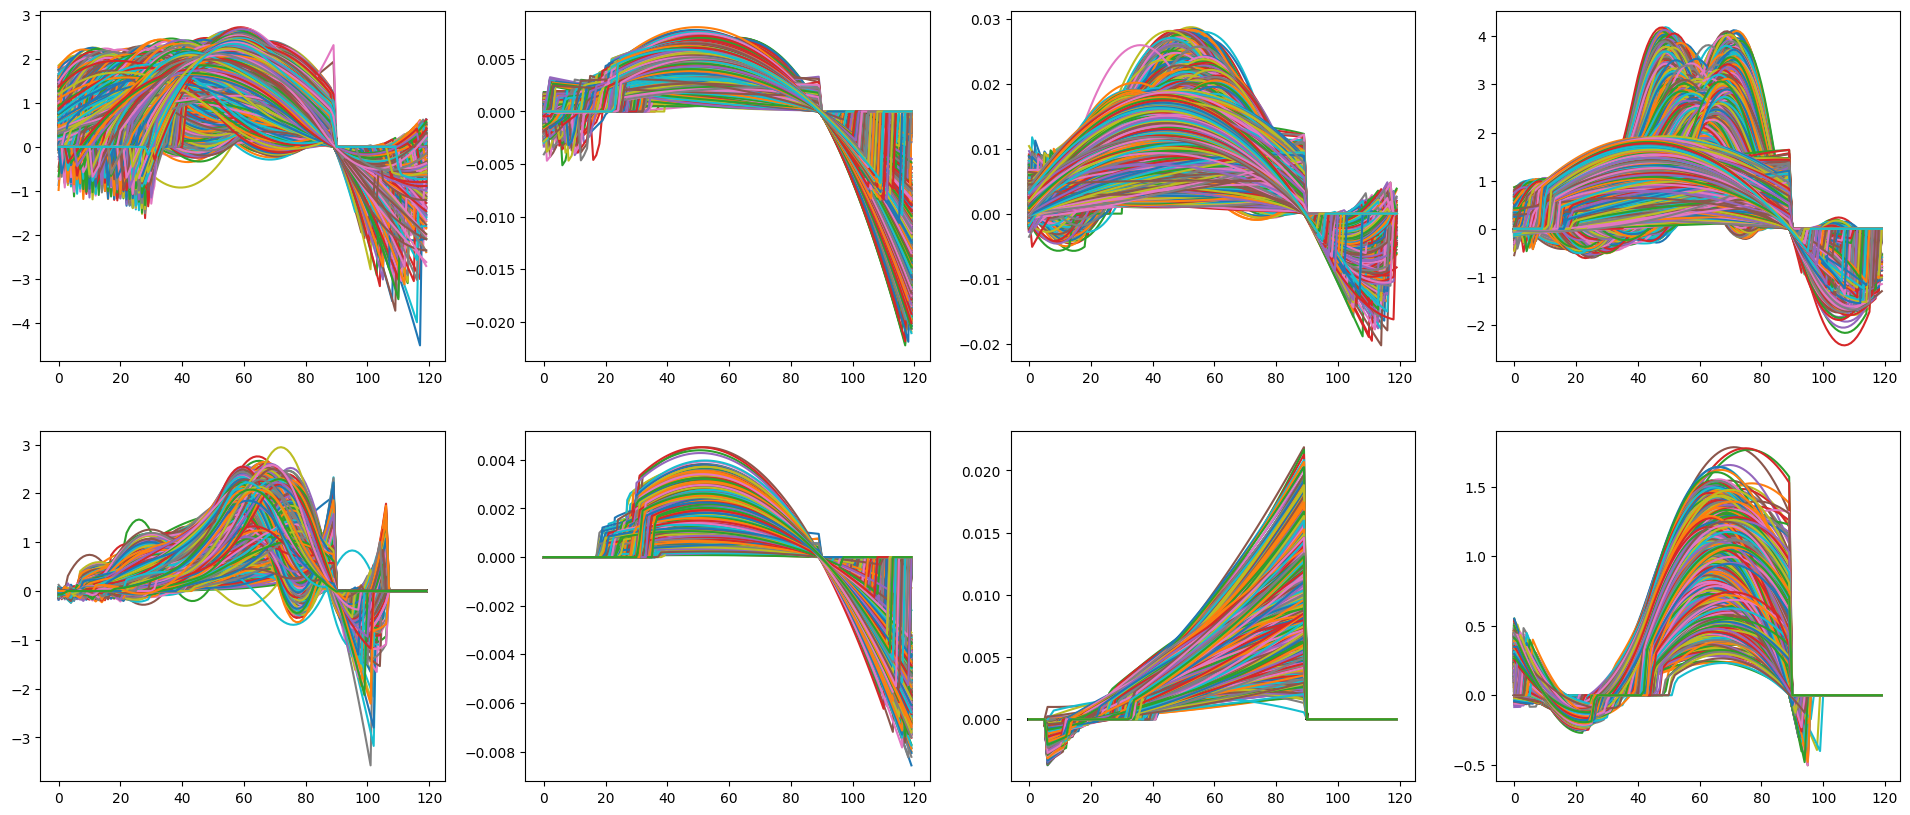

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 10))

axes[0][0].plot(x_train_grid_cc.T);
axes[0][1].plot(x_train_grid_exg.T);
axes[0][2].plot(x_train_grid_ch.T);
axes[0][3].plot(x_train_grid_cv.T);

axes[1][0].plot(x_test_grid_cc.T);
axes[1][1].plot(x_test_grid_exg.T);
axes[1][2].plot(x_test_grid_ch.T);
axes[1][3].plot(x_test_grid_cv.T);

### save data

In [27]:
# save training data
## grid_cc
with open("./data/train_data/grid_cc.npy", "wb") as fin:
    np.save(fin, x_train_grid_cc)
    
## grid_exg
with open("./data/train_data/grid_exg.npy", "wb") as fin:
    np.save(fin, x_train_grid_exg)
    
## grid_ch
with open("./data/train_data/grid_ch.npy", "wb") as fin:
    np.save(fin, x_train_grid_ch)
    
## grid_cv
with open("./data/train_data/grid_cv.npy", "wb") as fin:
    np.save(fin, x_train_grid_cv)
    
## yield training data
with open("./data/train_data/yield_train.npy", "wb") as fin:
    np.save(fin, y_trainset)

In [28]:
# save testdata
## grid_cc
with open("./data/test_data/grid_cc.npy", "wb") as fin:
    np.save(fin, x_test_grid_cc)
    
## grid_exg
with open("./data/test_data/grid_exg.npy", "wb") as fin:
    np.save(fin, x_test_grid_exg)
    
## grid_ch
with open("./data/test_data/grid_ch.npy", "wb") as fin:
    np.save(fin, x_test_grid_ch)
    
## grid_cv
with open("./data/test_data/grid_cv.npy", "wb") as fin:
    np.save(fin, x_test_grid_cv)
    
## yield testing data
with open("./data/test_data/yield_test.npy", "wb") as fin:
    np.save(fin, y_testset)